In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import string

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
print(data.head(10))

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...


In [3]:
# divide into features / labels
# replace punctuation, special characters, numbers
# replace double spaces with one space
# convert to lowercase

features = data.iloc[:, 2].values
labels = data.iloc[:, 1].values

for i in range(len(features)):
  features[i] = features[i].replace("@user", "")
  features[i] = features[i].translate(str.maketrans('', '', string.punctuation))
  features[i] = ''.join(i for i in features[i] if not i.isdigit())
  features[i] = re.sub(r'\s+', ' ', features[i], flags=re.I)
  features[i] = features[i].lower()

In [4]:
# TFIDF processing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(features).toarray()

In [5]:
# divide into test / train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
predictions = text_classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[5921   64]
 [ 198  210]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.77      0.51      0.62       408

    accuracy                           0.96      6393
   macro avg       0.87      0.75      0.80      6393
weighted avg       0.95      0.96      0.96      6393

0.9590176755826686


In [21]:
# Read the tweet text only:
tweets = pd.Series(data.tweet).to_string()

# type of the data read:
print(type(tweets))
# Length of the text:
print(len(tweets))

# tokensize the text by sentences:
sentences = sent_tokenize(tweets)
# print(sentences)

# toekenize the text by words:
words = word_tokenize(tweets)
# print(words)

Output hidden; open in https://colab.research.google.com to view.

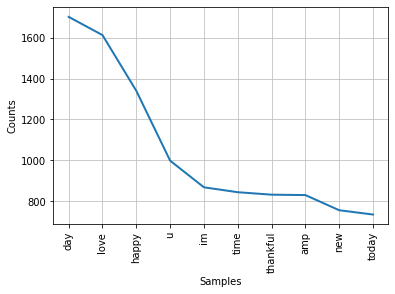

In [26]:
# Import required libraries:
from nltk.probability import FreqDist

# remove punctuation from words:
words_nopunc = []
for w in words:
    if w.isalpha():
        words_nopunc.append(w.lower())

# remove stop words:
stopwords = stopwords.words("english")
clean_words = []
for w in words_nopunc:
    if w not in stopwords:
        clean_words.append(w)

# Find the frequency:
fdist = FreqDist(clean_words)

# Print 10 most common words:
fdist.most_common(10)

# Plot the graph for fdist:
import matplotlib.pyplot as plt

fdist.plot(10)

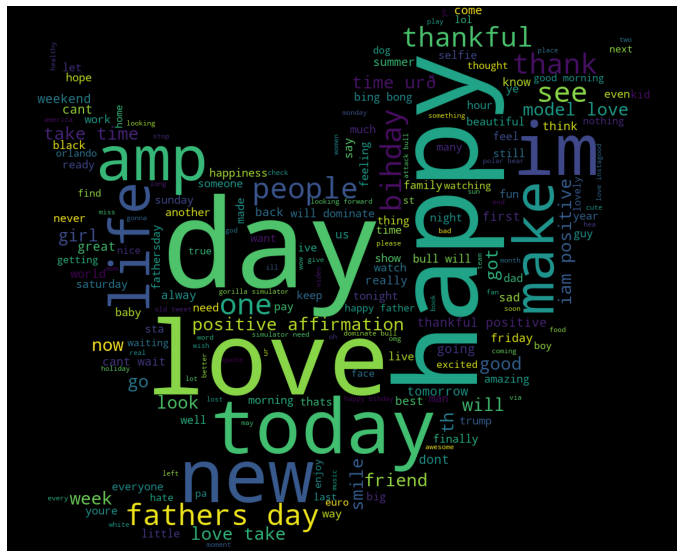

In [34]:
# wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import requests
from PIL import Image

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Generating the wordcloud:
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(tweets)

# Plot the wordcloud:
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

# To remove the axis value:
plt.axis("off") 
plt.show()

In [38]:
# PoS

tagged_words = nltk.pos_tag(clean_words)
print(tagged_words)

Output hidden; open in https://colab.research.google.com to view.